In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from skimage import io

In [7]:
# Specify the absolute path to your image
image_path = "/Users/robertroskoden/Documents/DataScieneBootcampSPICED/ds-capestone-project-DW89-old/CutOuts/007_Steglitzer_Sate.png_CO.png"

# Load the image using its absolute path
image = io.imread(image_path)

In [8]:
# Preprocess the image: convert to a 2D array of pixels
pixels = image.reshape(-1, 3)

In [9]:
# K-means clustering
kmeans = KMeans(n_clusters=5)  # Set the number of clusters
kmeans.fit(pixels)
kmeans_labels = kmeans.labels_

/Users/robertroskoden/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# KNN refinement
n_neighbors = 10  # Number of nearest neighbors to consider for KNN
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
knn.fit(pixels)
knn_labels = knn.kneighbors(pixels, return_distance=False).mean(axis=1)

In [12]:
# Combine K-means and KNN labels for refined clustering
combined_labels = np.column_stack((kmeans_labels, knn_labels))

In [14]:
# Calculate the final cluster labels based on a majority vote
combined_labels = np.round(combined_labels).astype(int)
final_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=combined_labels)

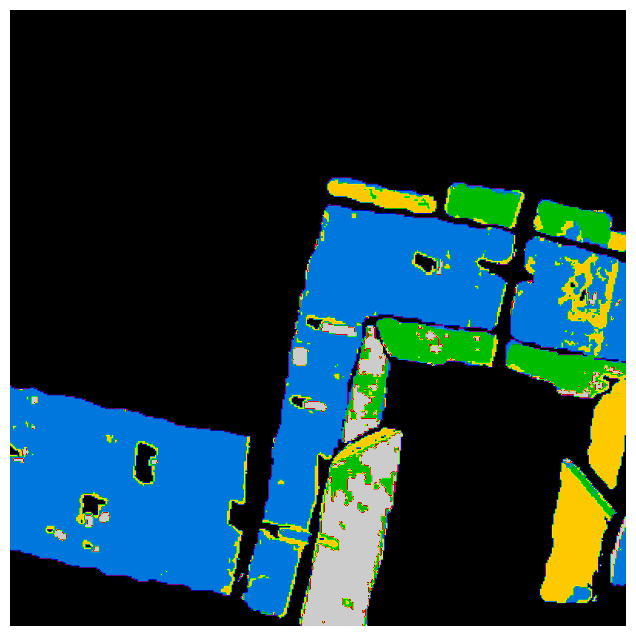

In [17]:
# Reshape the final labels back into the shape of the original image
segmented_image = final_labels.reshape(image.shape[:2])

# Visualize the segmented image
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [18]:
# Calculate silhouette score for evaluation
silhouette_avg = silhouette_score(pixels, final_labels)

print(f"Silhouette Score: {silhouette_avg}")




Silhouette Score: 0.859025156625798
